# Predicting Airbnb Listing Prices with Multiple Regression

In this exercise, we will build a multiple regression model to predict Airbnb listing prices. We will work through the following steps:

1. **Data Loading & Exploratory Data Analysis (EDA)**
2. **Splitting the Data into Training and Testing Sets**
3. **Fitting the Multiple Regression Model**
4. **Model Diagnostics**
5. **Evaluating Model Performance on the Test Set**

## 1. Data Loading

In this step, we load the dataset, inspect its structure, and perform basic exploratory analysis.

In [1]:
# Import necessary libraries
import pandas as pd

# Load the dataset
data = pd.read_csv('airbnb_listings.csv')

# Display the first few rows to inspect the data
data.head()

,Price,Minimum_Nights,Accommodates,Bedrooms,Bathrooms,Distance_CityCenter,Review_Score,Number_of_Reviews,Amenities_Score,Superhost,Listing_Age,Room_Type
0,244.33,7,2,5,2.3,1.6,4.7,132,2,0,6,Shared room
1,178.13,4,1,2,2.3,3.7,4.7,357,3,0,2,Entire home/apt
2,240.47,8,7,0,2.7,1.4,4.7,258,9,1,0,Entire home/apt
3,173.71,5,7,0,1.5,1.4,3.9,436,7,0,4,Entire home/apt
4,259.00,7,8,3,2.0,3.5,3.4,22,7,1,1,Entire home/apt


## 2. Splitting the Data into Training and Testing Sets

We split our data so that we can train the model on one set and evaluate its performance on unseen data.

In [18]:
from sklearn.model_selection import train_test_split

# Split the data: 70% for training, 30% for testing
train_data, test_data = train_test_split(data, test_size=0.20, random_state=42)

print("Full data set shape", data.shape,"\n---")
print("Training set shape:", train_data.shape)
print("Testing set shape:", test_data.shape)

Full data set shape (100, 12) 
---
Training set shape: (80, 12)
Testing set shape: (20, 12)


## 3. Fitting a Model

### 3.1 Fitting a Simple Model (Too Simple, Underfitting)

We start with specifying a simple model that uses the number of *bedrooms* to predict the nightly price.

$$
\begin{aligned}
\text{Price}_i &= \beta_0 + \beta_1 \cdot \text{Accomodates} + \epsilon_i
\end{aligned}
$$

Here, we’ll use the Ordinary Least Squares (OLS) method to estimate the regression weights ($\beta_i$).

In [11]:
import statsmodels.formula.api as smf

# Define the model formula
formula = ("Price ~ Accommodates")

# Fit the model using OLS and the training_data
simple_model = smf.ols(formula=formula, data=train_data).fit()

# Show model summary
simple_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     3.825
Date:                Tue, 11 Feb 2025   Prob (F-statistic):             0.0535
Time:                        14:35:59   Log-Likelihood:                -493.80
No. Observations:                  95   AIC:                             991.6
Df Residuals:                      93   BIC:                             996.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      188.7412      9.667     19.525      0.000     169.545     207.937
Accommodates     3.1277      1.599      1.956      0.053      -0.048       6.303
==============================================================================
Omnibus:                        4.238   Durbin-Watson:                   2.145
Prob(Omnibus):                  0.120   Jarque-Bera (JB):                2.580
Skew:                           0.191   Prob(JB):                        0.275
Kurtosis:                       2.289   Cond. No.                         13.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Simple Model: Predictive Power on Trained Data
Let's examine the actual vs. the predicted prices based on this simple model.

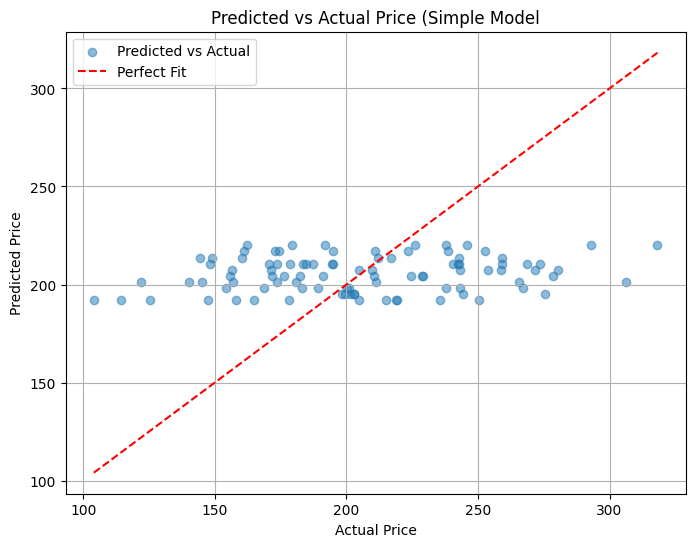

In [12]:
import matplotlib.pyplot as plt

# Extract actual and predicted values
actual = train_data["Price"]
predicted = simple_model.fittedvalues

# Create scatter plot
plt.figure(figsize=(8,6))
plt.scatter(actual, predicted, alpha=0.5, label="Predicted vs Actual")

# Add perfect prediction reference line
plt.plot([actual.min(), actual.max()], [actual.min(), actual.max()], 'r--', label="Perfect Fit")

# Labels and title
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Predicted vs Actual Price (Simple Model")
plt.legend()
plt.grid(True)

# Show plot
plt.show()

## 3.2 Fitting a Multiple Regression Model (Full model, good fit)

Now, we fit a moderate model using all the main predictors, including a categorical indicator for Room_Type. The mathematical specification of the model is:

$$
\begin{aligned}
\text{Price}_i &= \beta_0 + \beta_1 \cdot \text{Minimum\_Nights}_i + \beta_2 \cdot \text{Accommodates}_i + \beta_3 \cdot \text{Bedrooms}_i \\
&\quad + \beta_4 \cdot \text{Bathrooms}_i + \beta_5 \cdot \text{Distance\_CityCenter}_i + \beta_6 \cdot \text{Review\_Score}_i \\
&\quad + \beta_7 \cdot \text{Number\_of\_Reviews}_i + \beta_8 \cdot \text{Amenities\_Score}_i + \beta_9 \cdot \text{Superhost}_i \\
&\quad + \beta_{10} \cdot \text{Listing\_Age}_i + \beta_{11} \cdot \text{Room\_Type\_Private}_i \\
&\quad + \beta_{12} \cdot \text{Room\_Type\_Shared}_i + \epsilon_i
\end{aligned}
$$


Will use OLS again to estimate the regression weights ($\beta_i$).

In [13]:
import statsmodels.formula.api as smf

# Define the model formula:
# "Price" is our dependent variable.
# The tilde (~) separates the dependent variable from the predictors.
# C(Room_Type) tells statsmodels to treat Room_Type as a categorical variable.
formula = ("Price ~ Minimum_Nights + Accommodates + Bedrooms + Bathrooms + "
           "Distance_CityCenter + Review_Score + Number_of_Reviews + Amenities_Score + "
           "Superhost + Listing_Age + C(Room_Type)")

#formula = ("Price ~ Minimum_Nights")

# Fit the model using the training data
full_model = smf.ols(formula=formula, data=train_data).fit()

# Print the model summary
full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     182.1
Date:                Tue, 11 Feb 2025   Prob (F-statistic):           8.84e-54
Time:                        14:36:00   Log-Likelihood:                -338.03
No. Observations:                  95   AIC:                             702.1
Df Residuals:                      82   BIC:                             735.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       64.0535     10.443      6.133      0.000      43.278      84.829
C(Room_Type)[T.Private room]    -0.5480      2.088     -0.262      0.794      -4.701       3.605
C(Room_Type)[T.Shared room]     -4.0178      3.824     -1.051      0.297     -11.626       3.590
Minimum_Nights                  -0.2295      0.367     -0.626      0.533      -0.959       0.500
Accommodates                     4.2507      0.341     12.472      0.000       3.573       4.929
Bedrooms                        19.0463      0.584     32.593      0.000      17.884      20.209
Bathrooms                       13.2657      1.652      8.030      0.000       9.979      16.552
Distance_CityCenter             -3.9183      0.346    -11.339      0.000      -4.606      -3.231
Review_Score                    13.6138      1.770      7.689      0.000      10.092      17.136
Number_of_Reviews               -0.0096      0.007     -1.391      0.168      -0.023       0.004
Amenities_Score                  4.2828      0.332     12.919      0.000       3.623       4.942
Superhost                       13.1116      1.944      6.744      0.000       9.244      16.979
Listing_Age                     -2.8517      0.312     -9.128      0.000      -3.473      -2.230
==============================================================================
Omnibus:                        2.177   Durbin-Watson:                   1.727
Prob(Omnibus):                  0.337   Jarque-Bera (JB):                1.781
Skew:                           0.033   Prob(JB):                        0.410
Kurtosis:                       3.668   Cond. No.                     3.28e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Full Model: Predictive Power on Trained Data

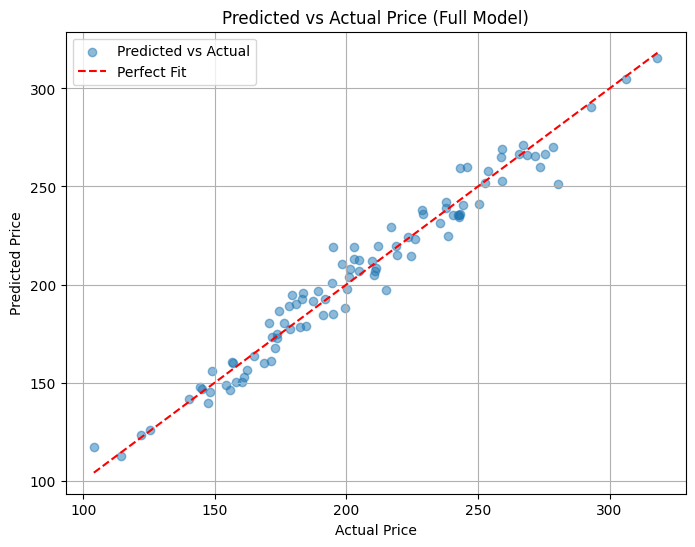

In [14]:
import matplotlib.pyplot as plt

# Extract actual and predicted values
actual = train_data["Price"]
predicted = full_model.fittedvalues

# Create scatter plot
plt.figure(figsize=(8,6))
plt.scatter(actual, predicted, alpha=0.5, label="Predicted vs Actual")

# Add perfect prediction reference line
plt.plot([actual.min(), actual.max()], [actual.min(), actual.max()], 'r--', label="Perfect Fit")

# Labels and title
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Predicted vs Actual Price (Full Model)")
plt.legend()
plt.grid(True)

# Show plot
plt.show()

In [15]:
# Create polynomial terms for two predictors in the dataset
train_data['Accommodates_sq'] = train_data['Accommodates'] ** 2
train_data['Distance_sq'] = train_data['Distance_CityCenter'] ** 2

test_data['Accommodates_sq'] = test_data['Accommodates'] ** 2
test_data['Distance_sq'] = test_data['Distance_CityCenter'] ** 2

# Overfitting model: include polynomial terms and interaction between Review_Score and Number_of_Reviews
formula_over = (
    "Price ~ Minimum_Nights + Accommodates + Accommodates_sq + Bedrooms + Bathrooms + "
    "Distance_CityCenter + Distance_sq + Review_Score * Number_of_Reviews + "
    "Amenities_Score + Superhost + Listing_Age + C(Room_Type)"
)
complex_model = smf.ols(formula=formula_over, data=train_data).fit()
complex_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     140.7
Date:                Tue, 11 Feb 2025   Prob (F-statistic):           1.85e-50
Time:                        14:36:01   Log-Likelihood:                -337.91
No. Observations:                  95   AIC:                             707.8
Df Residuals:                      79   BIC:                             748.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                         58.5725     16.566      3.536      0.001      25.598      91.547
C(Room_Type)[T.Private room]      -0.5472      2.141     -0.256      0.799      -4.810       3.715
C(Room_Type)[T.Shared room]       -4.0616      3.992     -1.017      0.312     -12.008       3.885
Minimum_Nights                    -0.2444      0.401     -0.610      0.544      -1.042       0.553
Accommodates                       4.3822      1.522      2.879      0.005       1.352       7.412
Accommodates_sq                   -0.0125      0.140     -0.089      0.929      -0.292       0.267
Bedrooms                          19.0759      0.604     31.571      0.000      17.873      20.279
Bathrooms                         13.3216      1.690      7.880      0.000       9.957      16.686
Distance_CityCenter               -3.5629      1.678     -2.124      0.037      -6.903      -0.223
Distance_sq                       -0.0320      0.155     -0.207      0.837      -0.340       0.276
Review_Score                      14.7338      3.590      4.104      0.000       7.589      21.879
Number_of_Reviews                  0.0087      0.051      0.172      0.864      -0.092       0.109
Review_Score:Number_of_Reviews    -0.0045      0.013     -0.352      0.726      -0.030       0.021
Amenities_Score                    4.2565      0.351     12.114      0.000       3.557       4.956
Superhost                         13.0492      2.045      6.381      0.000       8.979      17.120
Listing_Age                       -2.8411      0.323     -8.792      0.000      -3.484      -2.198
==============================================================================
Omnibus:                        2.008   Durbin-Watson:                   1.714
Prob(Omnibus):                  0.366   Jarque-Bera (JB):                1.570
Skew:                           0.011   Prob(JB):                        0.456
Kurtosis:                       3.629   Cond. No.                     2.12e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.12e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 4. Model Evaluation

We now evaluate all three models using both training and test data. 

The goal is to see:
- Underfitting: High error on both training and test sets.
- Baseline Model: A balanced fit with moderate error on both sets.
- Overfitting: Very low error on the training set but significantly higher error on the test set.


In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

def evaluate_model(model, train, test, model_name="Model"):
    # Predict on training and test sets
    predictions_train = model.predict(train)
    predictions_test = model.predict(test)
    
    # Calculate error metrics
    mse_train = mean_squared_error(train['Price'], predictions_train)
    rmse_train = np.sqrt(mse_train)
    mae_train = mean_absolute_error(train['Price'], predictions_train)
    
    mse_test = mean_squared_error(test['Price'], predictions_test)
    rmse_test = np.sqrt(mse_test)
    mae_test = mean_absolute_error(test['Price'], predictions_test)
    
    print(f"\n{model_name} Performance:")
    print(f"Training - MSE: {mse_train:.2f}, RMSE: {rmse_train:.2f}, MAE: {mae_train:.2f}")
    print(f"Testing  - MSE: {mse_test:.2f}, RMSE: {rmse_test:.2f}, MAE: {mae_test:.2f}")

# Prepare datasets for evaluation
# For the baseline model, no additional columns are needed.
# For the overfitting model, ensure that polynomial terms are present in test_data as well.
train_eval = train_data.copy()
test_eval = test_data.copy()

# Evaluate all three models:
evaluate_model(simple_model, train_eval, test_eval, model_name="Simple Model (Underfitting)")
evaluate_model(full_model, train_eval, test_eval, model_name="Full Model")


Simple Model (Underfitting) Performance:
Training - MSE: 1859.39, RMSE: 43.12, MAE: 36.39
Testing  - MSE: 2414.80, RMSE: 49.14, MAE: 39.71

Full Model Performance:
Training - MSE: 69.65, RMSE: 8.35, MAE: 6.73
Testing  - MSE: 128.11, RMSE: 11.32, MAE: 9.28
